<a href="https://colab.research.google.com/github/adamlutzz/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module1-afirstlookatdata/LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
drinks = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')
print(drinks.shape)
drinks.head()

(193, 5)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [3]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [5]:
drinks.sort_values('beer_servings', ascending=False)[:10]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
117,Namibia,376,3,1,6.8
45,Czech Republic,361,170,134,11.8
62,Gabon,347,98,59,8.9
65,Germany,346,117,175,11.3
98,Lithuania,343,244,56,12.9
135,Poland,343,215,56,10.9
188,Venezuela,333,100,3,7.7
81,Ireland,313,118,165,11.4
129,Palau,306,63,23,6.9
140,Romania,297,122,167,10.4


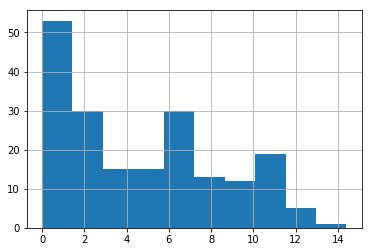

In [7]:
drinks.total_litres_of_pure_alcohol.hist()
plt.show()

In [8]:
drinks['drinks_alcohol'] = np.where(drinks['total_litres_of_pure_alcohol'] > 9, 'high',
                           np.where(drinks['total_litres_of_pure_alcohol'] >= 6, 'medium',
                           np.where(drinks['total_litres_of_pure_alcohol'] == 0, 'none', 'low')))

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol
0,Afghanistan,0,0,0,0.0,none
1,Albania,89,132,54,4.9,low
2,Algeria,25,0,14,0.7,low
3,Andorra,245,138,312,12.4,high
4,Angola,217,57,45,5.9,low


In [9]:
drinks.drinks_alcohol.value_counts()

low       105
medium     41
high       34
none       13
Name: drinks_alcohol, dtype: int64

In [10]:
countries = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
print(countries.shape)
countries.head()

(249, 11)


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [0]:
drinks.at[184, 'country'] = 'United States of America'

In [12]:
countries[['name', 'region', 'sub-region']].head()

,name,region,sub-region
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia


In [13]:
df = pd.merge(drinks, countries[['name', 'region', 'sub-region']], how='left', left_on='country', right_on='name')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
0,Afghanistan,0,0,0,0.0,none,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,low,Albania,Europe,Southern Europe
2,Algeria,25,0,14,0.7,low,Algeria,Africa,Northern Africa
3,Andorra,245,138,312,12.4,high,Andorra,Europe,Southern Europe
4,Angola,217,57,45,5.9,low,Angola,Africa,Sub-Saharan Africa


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 9 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
drinks_alcohol                  193 non-null object
name                            168 non-null object
region                          168 non-null object
sub-region                      168 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 15.1+ KB


In [15]:
df.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
drinks_alcohol                   0
name                            25
region                          25
sub-region                      25
dtype: int64

In [16]:
df[df.region.isna()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
5,Antigua & Barbuda,102,128,45,4.9,low,NaN,NaN,NaN
20,Bolivia,167,41,8,3.8,low,NaN,NaN,NaN
21,Bosnia-Herzegovina,76,173,8,4.6,low,NaN,NaN,NaN
24,Brunei,31,2,1,0.6,low,NaN,NaN,NaN
28,Cote d'Ivoire,37,1,7,4.0,low,NaN,NaN,NaN
45,Czech Republic,361,170,134,11.8,high,NaN,NaN,NaN
46,North Korea,0,0,0,0.0,none,NaN,NaN,NaN
47,DR Congo,32,3,1,2.3,low,NaN,NaN,NaN
79,Iran,0,0,0,0.0,none,NaN,NaN,NaN
92,Laos,62,0,123,6.2,medium,NaN,NaN,NaN


In [17]:
df.region.value_counts()

Africa      48
Asia        40
Europe      37
Americas    28
Oceania     15
Name: region, dtype: int64

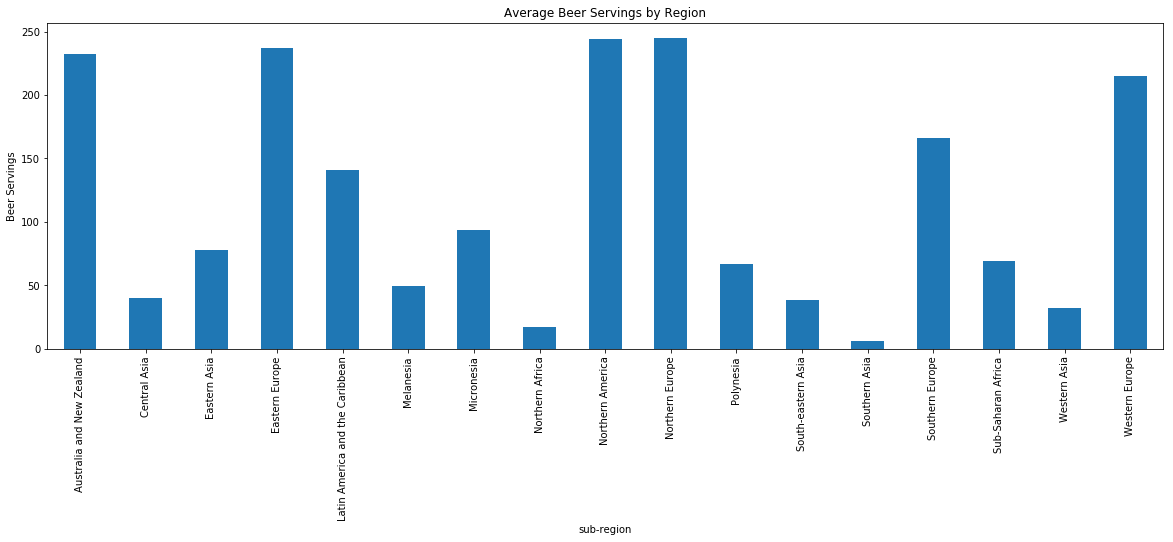

In [18]:
df.groupby('sub-region').beer_servings.mean().plot(kind='bar', figsize=(20,6))
plt.title('Average Beer Servings by Region')
plt.ylabel('Beer Servings')
plt.show()

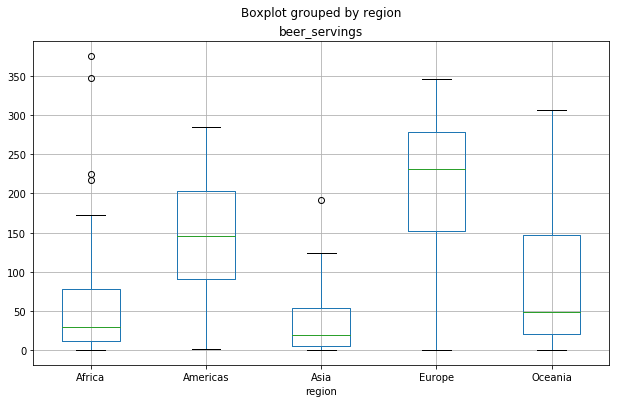

In [19]:
df.boxplot(column='beer_servings', by='region', figsize=(10,6))
plt.show()

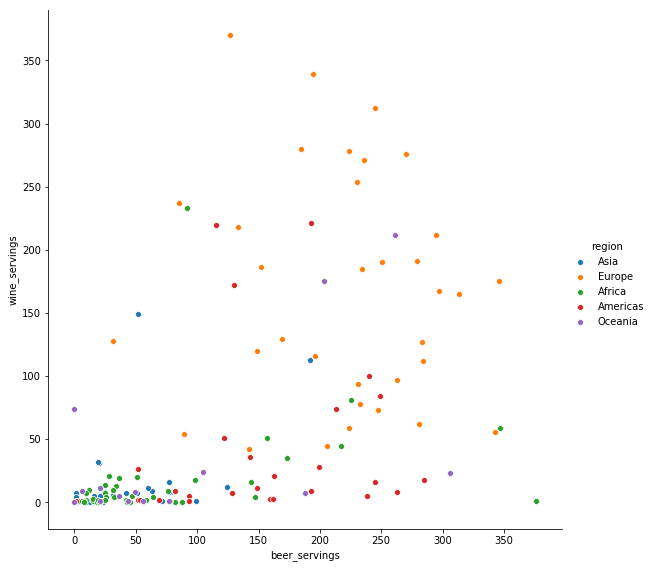

In [20]:
sns.pairplot(x_vars=['beer_servings'], y_vars=['wine_servings'], data=df, hue='region', height=8)
plt.show()

In [21]:
df = df.dropna(subset=["region"])
df.shape

(168, 9)

In [22]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import d3
from bokeh.plotting import figure
from bokeh.transform import transform
output_notebook()

x = df.beer_servings.values
y = df.wine_servings.values
country = df.country
region = df.region

source = ColumnDataSource(data=dict(x=x, y=y, country=country, region=region))
hover = HoverTool(tooltips=[
    ('index', '$index'),
    ('(x,y)', '(@x, @y)'),
    ('country', '@country'),
])

palette = d3['Category10'][len(df['region'].unique())]
mapper = CategoricalColorMapper(factors = df['region'].unique(), palette = palette)

# create figure and plot
p = figure(plot_width=600, plot_height=600,
          tools=[hover, 'wheel_zoom', 'box_zoom', 'reset'],
          title='Beer and Wine Servings per Year by Country')

# create plot
p.scatter(x='x', y='y', size=10, alpha=0.8,
         color={'field': 'region', 'transform': mapper},
         legend='region',
         source=source)

# add axis labels
p.xaxis.axis_label = 'Beer Servings'
p.yaxis.axis_label = 'Wine Servings'

show(p)

Loading BokehJS ...

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [24]:
mdf = pd.read_csv('https://raw.githubusercontent.com/adamlutzz/Test/master/top2018a.csv?token=AMR6YK7ALEKM5MWS57IRUM25E2K32')
print(mdf.shape)
mdf.head()

(100, 17)


,id,name,artists,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,Hip-Hop/Rap,0.754,0.449,7,-9.211,1,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973,4
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,Hip-Hop/Rap,0.740,0.613,8,-4.880,1,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606,4
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,Hip-Hop/Rap,0.587,0.535,5,-6.090,0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147,4
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,Hip-Hop/Rap,0.739,0.559,8,-8.011,1,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440,4
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,Hip-Hop/Rap,0.835,0.626,1,-5.833,1,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925,4


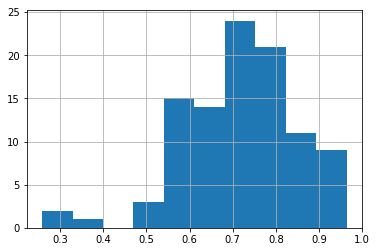

In [25]:
mdf.danceability.hist()
plt.show()

In [26]:
mdf['dur_mins'] = (mdf['duration_ms'] * .001) / 60
print(mdf.shape)

(100, 18)


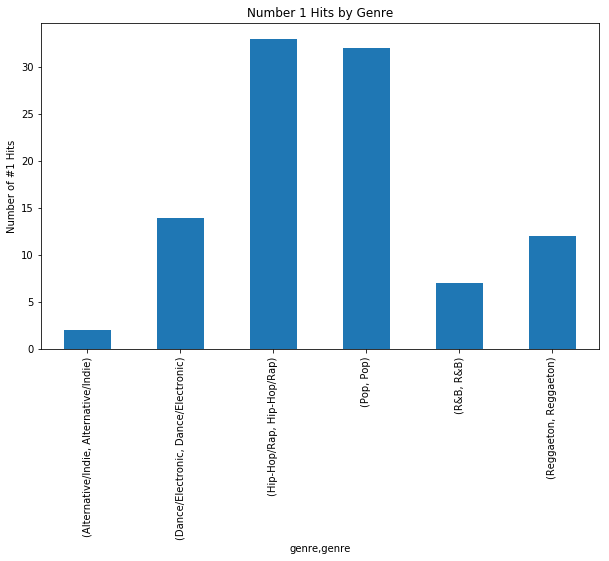

In [27]:
mdf.genre.value_counts()

mdf.groupby('genre').genre.value_counts().plot(kind='bar', figsize=(10,6))
plt.title('Number 1 Hits by Genre')
plt.ylabel('Number of #1 Hits')
plt.show()

In [30]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import d3
from bokeh.plotting import figure
from bokeh.transform import transform
output_notebook()


x = mdf.danceability.values
y = mdf.tempo.values
name = mdf.name
genre = mdf.genre

source = ColumnDataSource(data=dict(x=x, y=y, name=name, genre=genre))
hover = HoverTool(tooltips=[
    ('index', '$index'),
    ('(x,y)', '(@x, @y)'),
    ('name', '@name'),
])

palette = d3['Category10'][len(mdf['genre'].unique())]
mapper = CategoricalColorMapper(factors = mdf['genre'].unique(), palette = palette)

# create figure and plot
p = figure(plot_width=600, plot_height=600,
          tools=[hover, 'wheel_zoom', 'box_zoom', 'reset'],
          title='2018 Spotify Top 100 Songs danceability and tempo')

# create plot
p.scatter(x='x', y='y', size=10, alpha=0.8,
         color={'field': 'genre', 'transform': mapper},
         legend='genre',
         source=source)

# add axis labels
p.xaxis.axis_label = 'Danceability'
p.yaxis.axis_label = 'Tempo'

show(p)

Loading BokehJS ...

1. I took a list of the top 100 songs on spotify and created a chart to visualize the relation of tempo and danceability. I wanted to see if some songs had a high danceability even though their temp was low an viceversa. I also wanted to see if either had a strong correlation with top 100 songs. For example do all top 100 songs have a similar tempo? Or do songs of a similar genre all share a common tempo?

2. Looking for a good data source. I went through 3 different CSVs before I found one that had what I needed. At one point I was going to merge two dataframes but the shared feature was acutally missing a letter on one of them. It also happened to be 284000 rows so I determined it would take too long to search 100 songs in that dataframe to find the actual song ID.

3. How to import CSVs into colabs. I love data especially music so this was fun for me to play with and I want to continue this moving forward

4. I would like to build a model for a better shuffle button based on what music I like and am currently listening to.

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

2.  What was the most challenging part of what you did?

3.  What was the most interesting thing you learned?

4.  What area would you like to explore with more time?




## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.